# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = df.iloc[:, [1]].values
y = df.iloc[:, [2]].values

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [6]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [8]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(X, y.ravel())

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


## Predicting a new result

In [9]:
sc_y.inverse_transform(regressor.predict(sc_X.fit_transform([[6.5]])).reshape(-1, 1))

array([[131106.77303274]])

## Visualising the SVR results

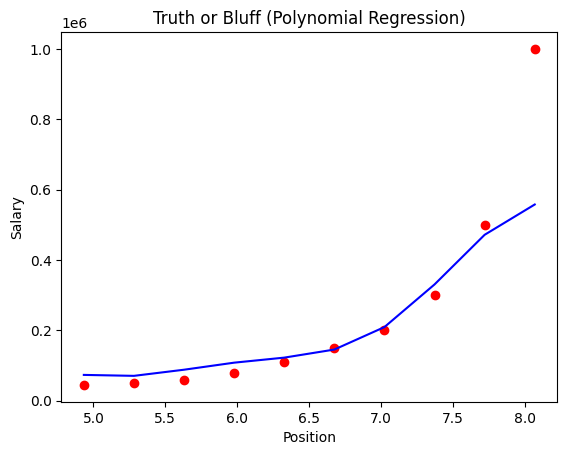

In [10]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

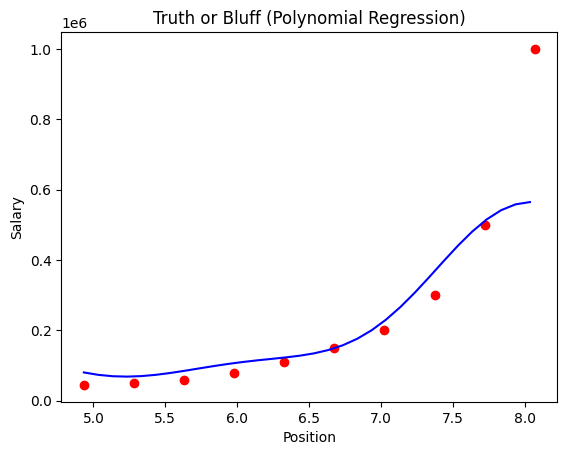

In [11]:
X_grid = np.arange(np.min(sc_X.inverse_transform(X)), np.max(sc_X.inverse_transform(X)), 0.1).reshape(-1, 1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.fit_transform(X_grid)).reshape(-1, 1)), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()